## Melendey diabetes data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## First, let us read the dataset

In [3]:
my_data = pd.read_csv("Melendey.csv")
my_data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## We don't need to know patient's ID and No. of patients, so let's do some cleaning

In [4]:
df = my_data.iloc[:,2:]
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Now we need to convert categorical data to numerical data

In [5]:
# First let's make a copy of the tailored database so we can implement changes
df_copy = df.copy()

In [16]:
# Remove rows with class = "P" as we don't need that
# then convert Male and Female to 1 and 0 through level, Class to be 1(Yes), 0(No), and get rid of P(predictice)
df_copy = df_copy.drop(df_copy.index[df_copy['CLASS'] == "P"])
level1 = df_copy[["Gender"]]  # level for gender
level2 = df_copy[["CLASS"]]  # level for class


,CLASS
0,N
1,N
2,N
3,N
4,N
...,...
995,Y
996,Y
997,Y
998,Y


In [10]:
from sklearn.preprocessing import OrdinalEncoder
# we provide the ordered categories to the encoder
enc1 = OrdinalEncoder(categories=[["F","M"]]) # assign Female = 0 and Male = 1
enc2 = OrdinalEncoder(categories=[["N","Y"]]) # assign N to 0 and Y = 1

# fit the encoder to the data
enc1.fit(level1)
enc2.fit(level2)

# encode the data
level_enc1 = enc1.transform(level1)
level_enc2 = enc2.transform(level2)

# implement the transformation on our dataset
df_copy["Gender"] == level_enc1
df_copy["CLASS"] == level_enc2

df_copy.head()

ValueError: ('Shapes must match', (947,), (947, 1))

SyntaxError: invalid syntax (2925497728.py, line 3)

# Now make a copy of the original dataset and implement the transformation


In [ ]:
df_copy["Gender"] = level_enc
df_copy.head()  # now gender become binary

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       N
1       N
2       N
3       N
4       N
       ..
995     Y
996    Y 
997    Y 
998    Y 
999    Y 
Name: CLASS, Length: 1000, dtype: object

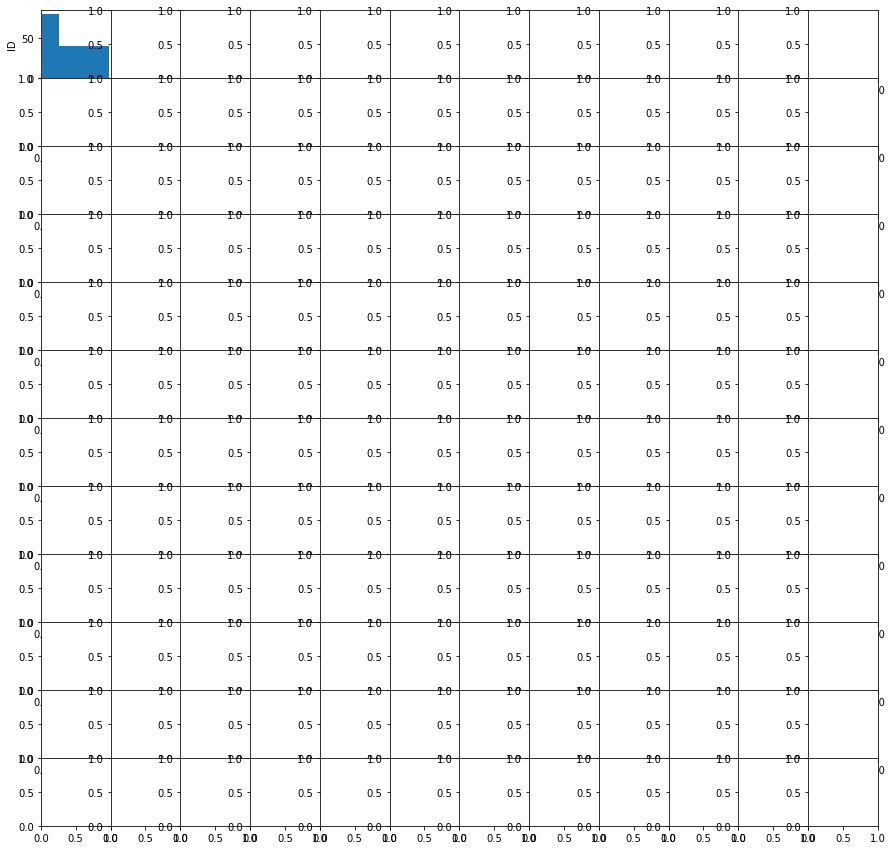

In [20]:
pd.plotting.scatter_matrix(my_data, c=my_data["CLASS"], figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)